# Q1-Exploratory distributions

### Αρχικά διαβάζουμε τα δεδομένα

In [1]:
import pandas as pd

path=r"C:\Unipi-CS\5ο εξάμηνο\Αναγνώριση Προτύπων\project\Data\original dataset\crimes.csv"

data=pd.read_csv(path)

### Ερώτημα : Plothistograms for the one-dimensional distributions of hour_float, victim_age, latitude,longitude (using TRAIN + VAL)

### Στη συνέχεια δηλώνουμε τα χαρακτηριστηκά που μας ενδιαφέρουν

In [2]:
features_q1a = ["hour_float", "victim_age", "latitude", "longitude"]

### Συνάρτηση για την δημιουργία των ιστογραμμάτων

In [3]:
import matplotlib.pyplot as plt

def plot_all_histograms(dataset, features):
    _, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    axes = axes.flatten()
    
    plot_color = 'skyblue'
    
    for i, par in enumerate(features):
        axes[i].hist(dataset[par], bins=15, color=plot_color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f"Distribution of: {par}", fontsize=12, fontweight='bold')
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


### Καλούμε την συνάρτηση με τα δεδομένα του train και του val

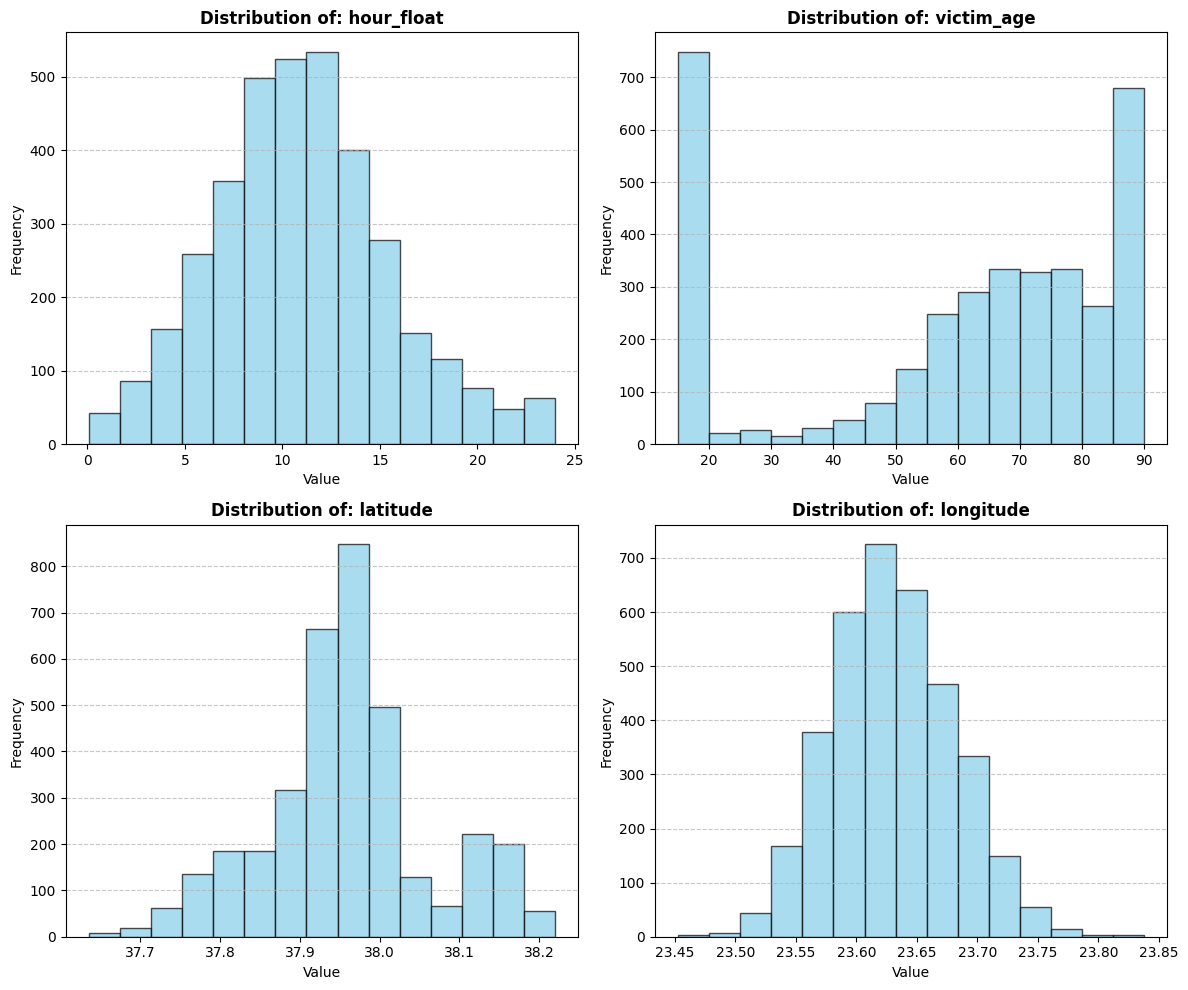

In [4]:
plot_all_histograms(data[data["split"] != "TEST"], features_q1a)

### Ερώτημα : Fit a single Gaussian distribution N(µ,σ2) using the sample mean and variance.

In [5]:
import math
import numpy as np

def Q1_a(df,feature):
    total=0
    N=len(df)
    for record in df[feature]:
        total+=record
    m=total/N
    total=0
    for record in df[feature]:
        total+=(record-m)**2
    var=total/N
    
    sigma=math.sqrt(var)
    
    plt.figure(figsize=(10, 6))

    plt.hist(df[feature], bins=30, density=True, 
            color='#a8dadc', edgecolor='#457b9d', alpha=0.7, label='Data Distribution')

    x = np.linspace(min(df[feature]), max(df[feature]), 1000)
    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - m) / sigma)**2)

    plt.plot(x, gaussian, color='#1d3557', linewidth=2.5, label='Gaussian Fit')
    plt.fill_between(x, gaussian, color='#1d3557', alpha=0.1) 

    plt.xlabel("Hour (float)", fontsize=11)
    plt.ylabel("Probability Density", fontsize=11)
    plt.title("Histogram with Gaussian Fit ", fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.show()
    
    return m,var,sigma



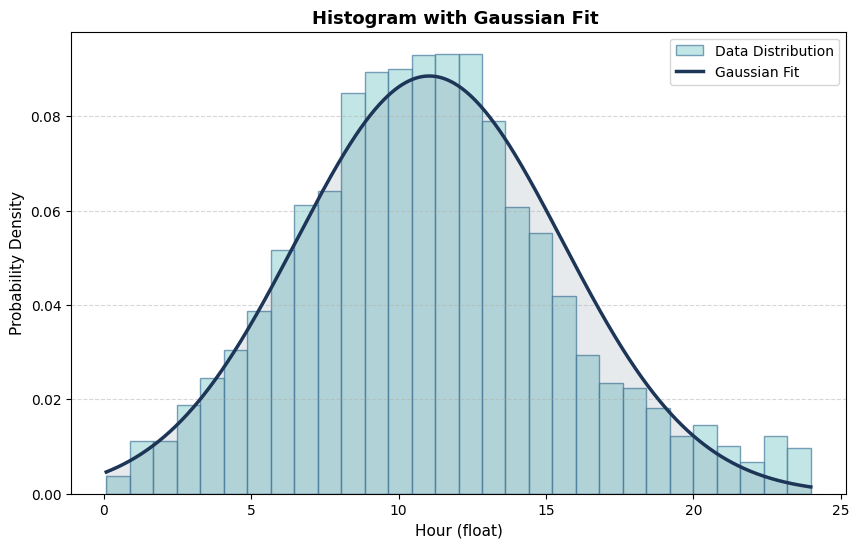

In [6]:
mean,var,sigma=Q1_a(data[data["split"] != "TEST"],"hour_float")

### Ερώτημα - Fit a 3-component 1D Gaussian mixture model using a suitable algorithm & Plot on the same figure the histogram of hour_float, the single Gaussian density,and the mixture density

In [7]:
from sklearn.mixture import GaussianMixture

def Q1_b_c(df,feature,mean,var,sigma):
    x=df[feature].values.reshape(-1,1)
    
    gmm=GaussianMixture(n_components=3,random_state=42)
    gmm.fit(x)
    
    weights=gmm.weights_
    means = gmm.means_.flatten()
    covariances = gmm.covariances_.flatten()
    sigmas_gmm = np.sqrt(covariances)
    
    plt.figure(figsize=(10, 6))
    plt.hist(df[feature], bins=30, density=True, alpha=0.3, color='gray', label='Data Histogram')
    x_plot = np.linspace(x.min(), x.max(), 1000)
    plt.plot(x_plot, (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x_plot - mean) / sigma)**2), 
         'r--', label='Single Gaussian (2.a)')
    
    logprob = gmm.score_samples(x_plot.reshape(-1, 1))
    plt.plot(x_plot, np.exp(logprob), color='blue', linewidth=2, label='3-Component GMM (2.b)')
    
    for i in range(3):
        comp = weights[i] * (1 / (sigmas_gmm[i] * np.sqrt(2*np.pi))) * \
        np.exp(-0.5 * ((x_plot - means[i]) / sigmas_gmm[i])**2)
        plt.plot(x_plot, comp, ':', label=f'Component {i+1}')
    
    plt.xlabel("hour_float")
    plt.ylabel("Density")
    plt.title("Comparison: Single Gaussian vs GMM")
    plt.legend()
    plt.show()

    print(f"GMM Weights: {weights}")
    print(f"GMM Means: {means}")
    print(f"GMM Variances: {covariances}")


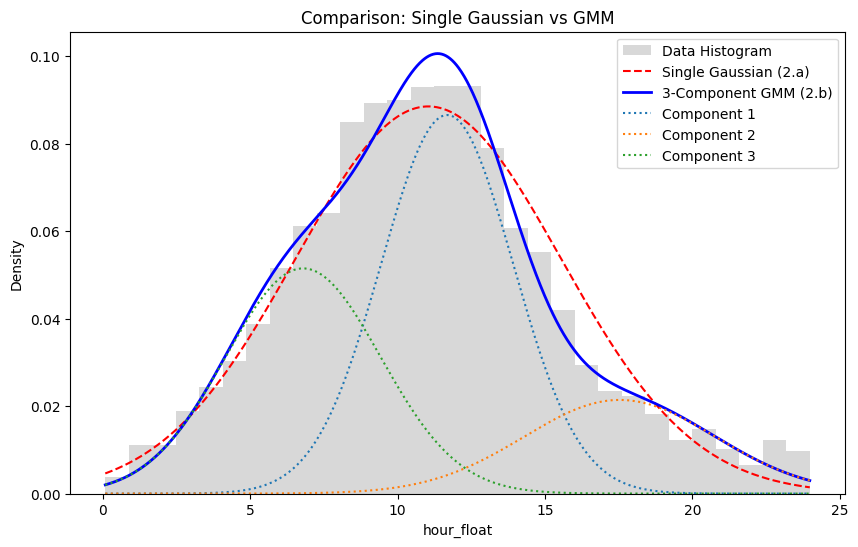

GMM Weights: [0.48603434 0.17426746 0.3396982 ]
GMM Means: [11.67883259 17.53385287  6.79149256]
GMM Variances: [ 5.01919638 10.54238881  6.92775849]


In [8]:
Q1_b_c(data[data["split"] != "TEST"],"hour_float",mean,var,sigma) 

### Ερώτημα -  As an additional exploratory step, produce at least one two-dimensional plot involving hour_float and one spatial feature (for example hour_float vs. latitude or hour_float vs. longitude), using TRAIN+VAL but without using any labels. Briefly describe any non-trivial pattern you observe (e.g. curved bands, dense regions, or “gaps”), without yet attempting to explain its cause

In [9]:
def Q1_additional(df):
    plt.figure(figsize=(12, 8))

    hb = plt.hexbin(df["hour_float"], df["latitude"], 
                    gridsize=40, cmap='YlGnBu', mincnt=1)
    cb = plt.colorbar(hb)
    cb.set_label('Number of Incidents')

    plt.xlabel("Hour of Day")
    plt.ylabel("Latitude")
    plt.title("Density Map: Where and When Crimes Occur")
    plt.show()
       

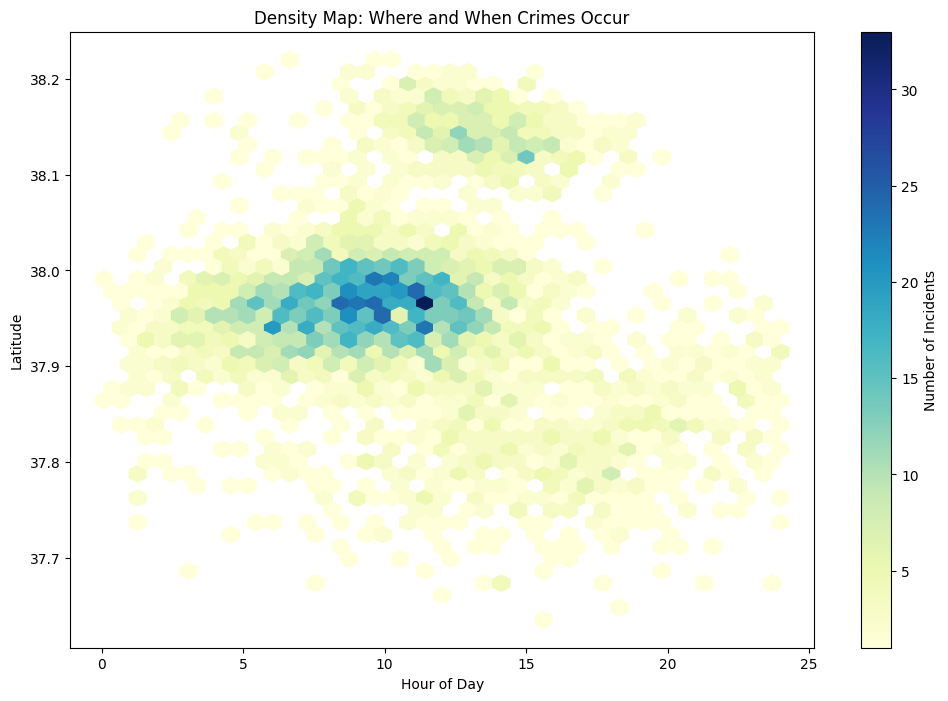

In [10]:
Q1_additional(data[data["split"] != "TEST"])